In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df['director'] = df['director'].fillna("Not Specified")
df['cast'] = df['cast'].fillna("Not Specified")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

In [7]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [8]:
text_columns = ['type', 'country', 'rating', 'listed_in']

for col in text_columns:
    df[col] = df[col].str.strip()

In [9]:
movies = df[df['type'] == 'Movie'].copy()

movies['duration'] = movies['duration'].str.replace(' min','')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

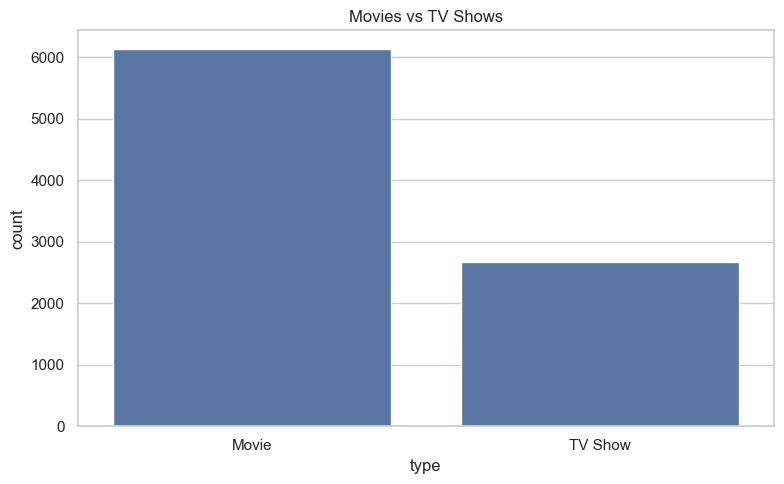

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.tight_layout()
plt.savefig("../images/movies_vs_tvshows.png", dpi=300)
plt.show()
plt.close()

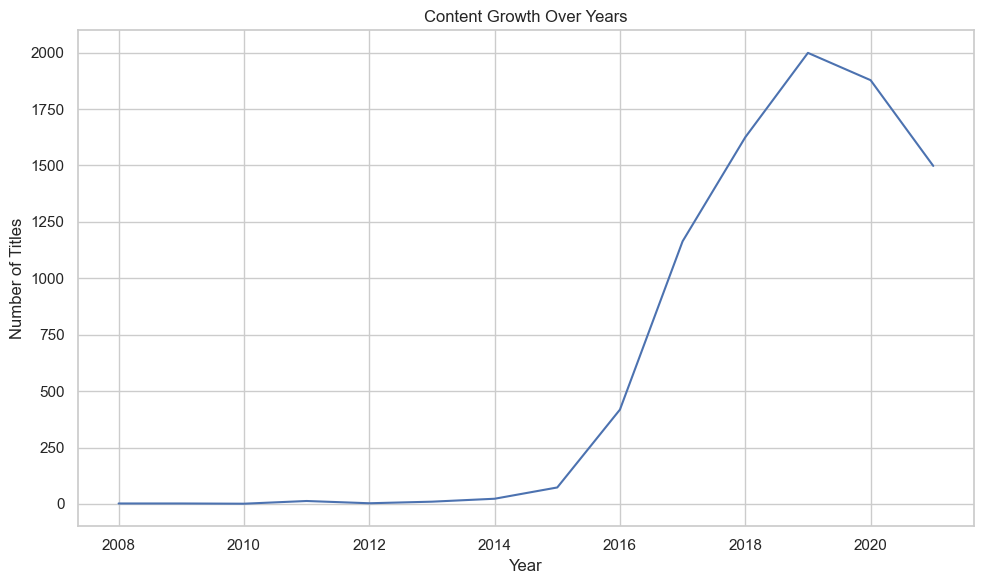

In [11]:
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot()
plt.title("Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.savefig("../images/content_growth_over_years.png", dpi=300)
plt.show()
plt.close()

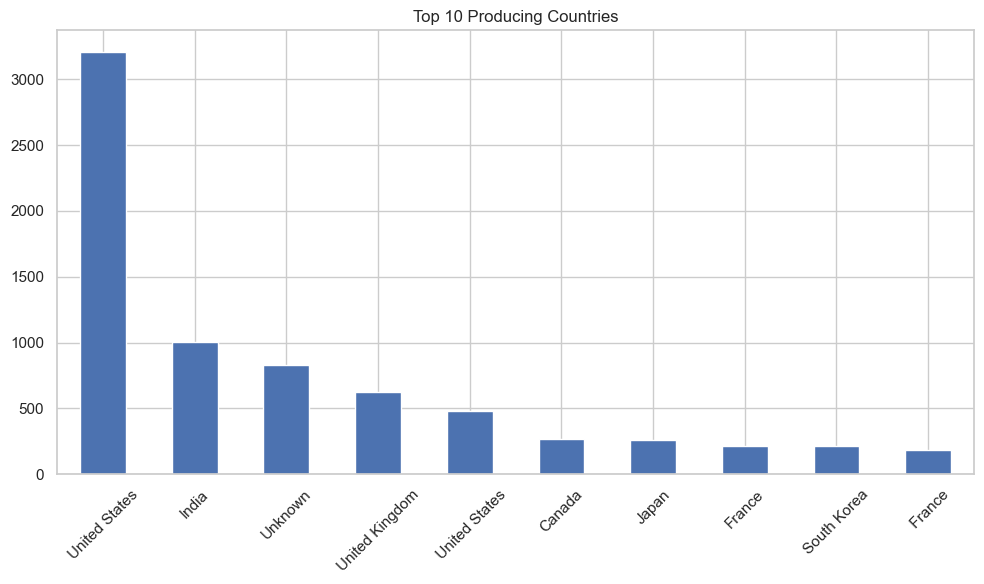

In [12]:
countries = df['country'].str.split(',', expand=True).stack()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.title("Top 10 Producing Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/top_10_countries.png", dpi=300)
plt.show()
plt.close()

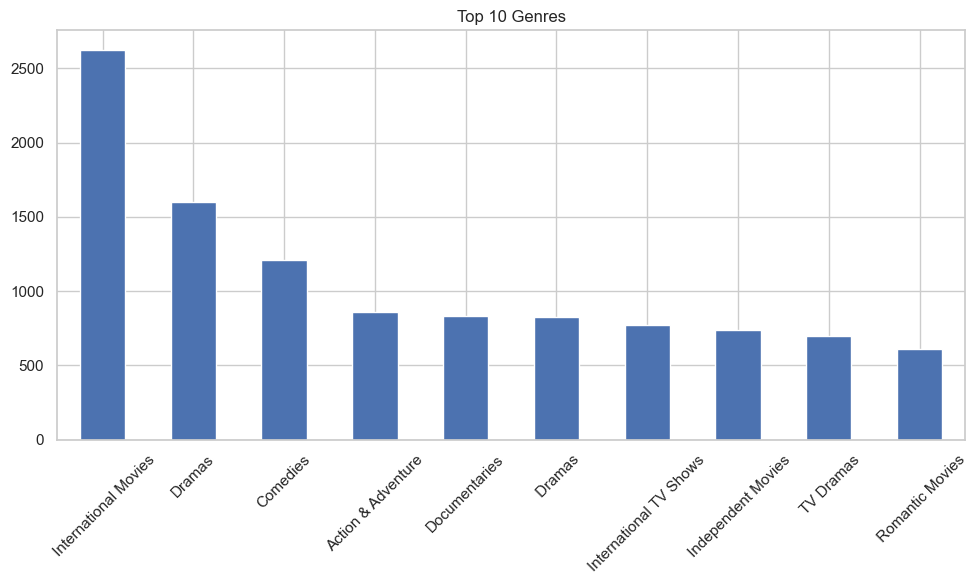

In [13]:
genres = df['listed_in'].str.split(',', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title("Top 10 Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/top_genres.png", dpi=300)
plt.show()
plt.close()

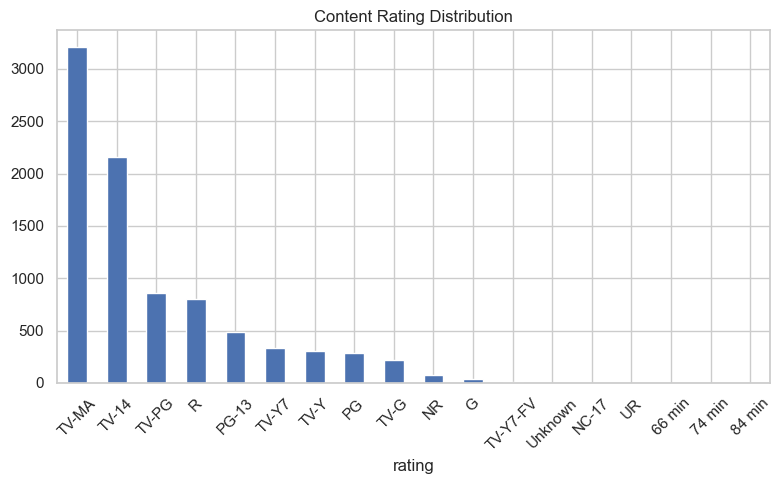

In [14]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Rating Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/rating_distribution.png", dpi=300)
plt.show()
plt.close()

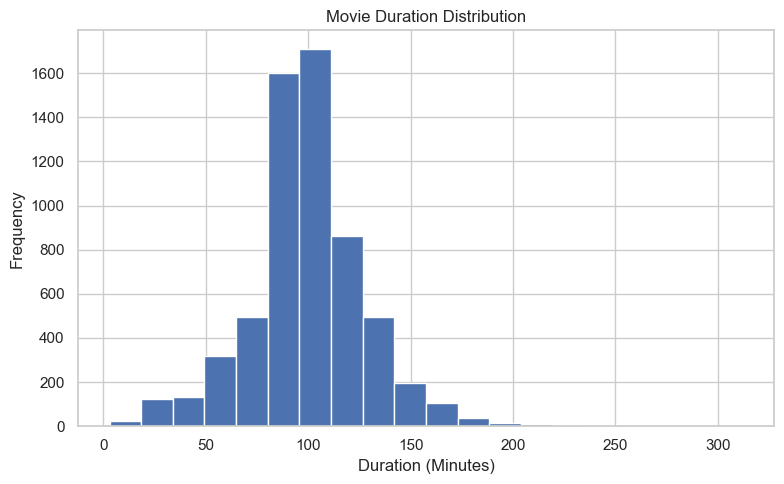

In [15]:
plt.figure(figsize=(8,5))
movies['duration'].hist(bins=20)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../images/movie_duration_distribution.png", dpi=300)
plt.show()
plt.close()

In [16]:
print("Total Titles:", len(df))
print("Total Movies:", len(df[df['type'] == 'Movie']))
print("Total TV Shows:", len(df[df['type'] == 'TV Show']))
print("Average Movie Duration:", round(movies['duration'].mean(),2))

Total Titles: 8807
Total Movies: 6131
Total TV Shows: 2676
Average Movie Duration: 99.58
